In [59]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


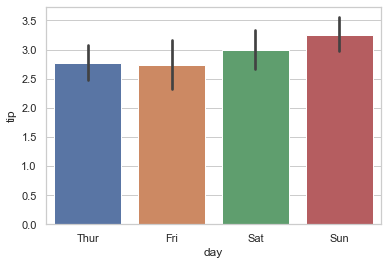

In [62]:
ax = sns.barplot(x="day", y="tip", data=tips)

In [63]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


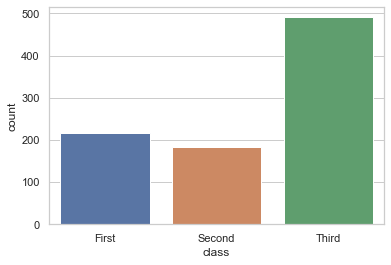

In [64]:
ax = sns.countplot(x="class", data=titanic)

In [65]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='Xh05@80yX',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_wn18')

In [66]:
entity = psql.read_sql("SELECT * FROM entity", connection)
entity.head()

,synset_id,name,pos_tag,sense_index,definition
0,14854262,stool,NN,2,solid excretory product evacuated from the bowels
1,00590383,chieftainship,NN,1,the position of chieftain
2,08769179,saxony,NN,1,an area in Germany around the upper Elbe river...
3,02338145,ondatra zibethica,NN,1,beaver-like aquatic rodent of North America wi...
4,01990168,founder,VB,2,sink below the surface


In [67]:
entity.count()

synset_id      40943
name           40943
pos_tag        40943
sense_index    40943
definition     40943
dtype: int64

In [68]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
synset_id,40943
name,40943
pos_tag,40943
sense_index,40943
definition,40943


In [69]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,synset_id,40943
1,name,40943
2,pos_tag,40943
3,sense_index,40943
4,definition,40943


In [70]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,synset_id,40943
1,name,40943
2,pos_tag,40943
3,sense_index,40943
4,definition,40943


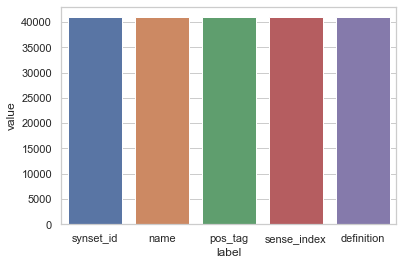

In [71]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [72]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,1,hypernym
1,2,synset domain usage of
2,3,also see
3,4,member of domain region
4,5,similar to


In [73]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,18
name,18


In [74]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,18
1,name,18


In [75]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,18
1,name,18


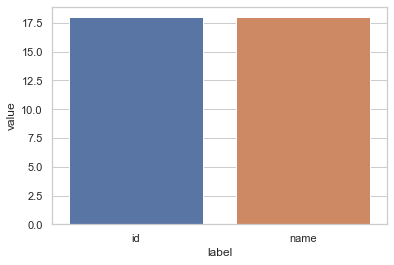

In [76]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [77]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,predicate,object
0,1,02174461,hypernym,02176268
1,1,03964744,hyponym,04371774
2,1,06845599,member of domain usage,03754979
3,2,00260881,hypernym,00260622
4,2,00789448,verb group,01062739


In [78]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,151442
subject,151442
predicate,151442
object,151442


In [79]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,151442
1,subject,151442
2,predicate,151442
3,object,151442


In [80]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts.head()

,label,value
0,id,151442
1,subject,151442
2,predicate,151442
3,object,151442


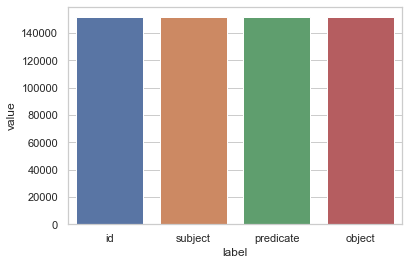

In [81]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [82]:
triple_counts.loc[0, 'value']

151442

In [83]:
triple_count = pd.Series({'triple': triple_counts.loc[0, 'value']})
entity_count = pd.Series({'entity': entity_counts.loc[0, 'value']})
relation_count = pd.Series({'relation': relation_counts.loc[0, 'value']})

triple_entity_relation_counts = pd.DataFrame([triple_count, entity_count, relation_count])
triple_entity_relation_counts.head()

,triple,entity,relation
0,151442.0,NaN,NaN
1,NaN,40943.0,NaN
2,NaN,NaN,18.0


In [84]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,151442
entity,40943
relation,18


In [85]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,151442
1,entity,40943
2,relation,18


In [86]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,151442
1,entity,40943
2,relation,18


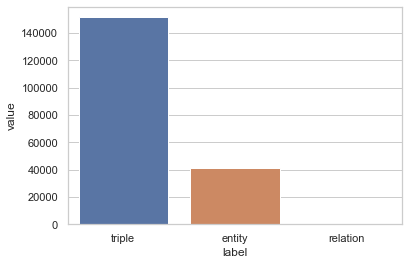

In [87]:
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)

In [88]:
fact = psql.read_sql("SELECT * FROM fact", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,7,11575425,dilleniid dicot genus,hyponym,12255934,genus pyrola
1,13,02716866,antibiotic drug,hyponym,03032576,ciprofloxacin
2,18,07965085,body,hyponym,08278169,college
3,27,07190941,charge,hypernym,07185325,request
4,31,12213635,proteaceae,member meronym,12214245,green dinosaur


In [89]:
fact = fact.set_index('id')
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
7,11575425,dilleniid dicot genus,hyponym,12255934,genus pyrola
13,02716866,antibiotic drug,hyponym,03032576,ciprofloxacin
18,07965085,body,hyponym,08278169,college
27,07190941,charge,hypernym,07185325,request
31,12213635,proteaceae,member meronym,12214245,green dinosaur


In [90]:
predicate_counts = fact['predicate'].value_counts()
predicate_counts

hyponym                        34832
hypernym                       34796
derivationally related form    29715
member meronym                  7402
member holonym                  7382
has part                        4816
part of                         4805
member of domain topic          3118
synset domain topic of          3116
instance hyponym                2935
instance hypernym               2921
also see                        1299
verb group                      1138
member of domain region          923
synset domain region of          903
synset domain usage of           632
member of domain usage           629
similar to                        80
Name: predicate, dtype: int64

In [91]:
predicate_counts.index

Index(['hyponym', 'hypernym', 'derivationally related form', 'member meronym',
       'member holonym', 'has part', 'part of', 'member of domain topic',
       'synset domain topic of', 'instance hyponym', 'instance hypernym',
       'also see', 'verb group', 'member of domain region',
       'synset domain region of', 'synset domain usage of',
       'member of domain usage', 'similar to'],
      dtype='object')

[Text(0, 0, 'hyponym'),
 Text(0, 0, 'hypernym'),
 Text(0, 0, 'derivationally related form'),
 Text(0, 0, 'member meronym'),
 Text(0, 0, 'member holonym'),
 Text(0, 0, 'has part'),
 Text(0, 0, 'part of'),
 Text(0, 0, 'member of domain topic'),
 Text(0, 0, 'synset domain topic of'),
 Text(0, 0, 'instance hyponym'),
 Text(0, 0, 'instance hypernym'),
 Text(0, 0, 'also see'),
 Text(0, 0, 'verb group'),
 Text(0, 0, 'member of domain region'),
 Text(0, 0, 'synset domain region of'),
 Text(0, 0, 'synset domain usage of'),
 Text(0, 0, 'member of domain usage'),
 Text(0, 0, 'similar to')]

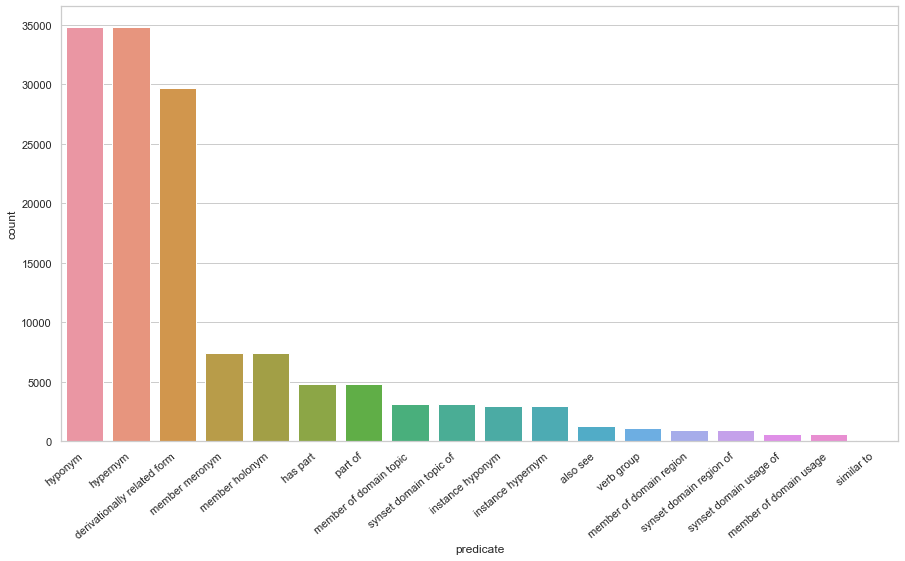

In [92]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x="predicate", data=fact, order = fact['predicate'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [93]:
object_counts = fact['o_name'].value_counts().to_frame()
object_counts.head()

,o_name
urban center,481
united kingdom of great britain and northern ireland,458
soul,375
war machine,344
law,291


In [94]:
object_counts.index

Index(['urban center', 'united kingdom of great britain and northern ireland',
       'soul', 'war machine', 'law', 'asterid dicot genus', 'bird genus',
       'modify', 'mammal genus', 'herbaceous plant',
       ...
       'sir patrick manson', 'ancient greek', 'groundsel tree', 'ornateness',
       'tamer', 'nilo-saharan language', 'mosquito fern',
       'south american indian', 'hippotragus', 'fall out'],
      dtype='object', length=32248)

In [95]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,urban center,481
1,united kingdom of great britain and northern i...,458
2,soul,375
3,war machine,344
4,law,291


In [96]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,urban center,481
1,united kingdom of great britain and northern i...,458
2,soul,375
3,war machine,344
4,law,291


[Text(0, 0, 'urban center'),
 Text(0, 0, 'united kingdom of great britain and northern ireland'),
 Text(0, 0, 'soul'),
 Text(0, 0, 'war machine'),
 Text(0, 0, 'law'),
 Text(0, 0, 'asterid dicot genus'),
 Text(0, 0, 'bird genus'),
 Text(0, 0, 'modify'),
 Text(0, 0, 'mammal genus'),
 Text(0, 0, 'herbaceous plant'),
 Text(0, 0, 'rosid dicot genus'),
 Text(0, 0, 'trade name'),
 Text(0, 0, 'magnoliopsid genus'),
 Text(0, 0, 'monocot genus'),
 Text(0, 0, 'fish genus'),
 Text(0, 0, 'animal order'),
 Text(0, 0, 'shrub'),
 Text(0, 0, 'arthropod genus'),
 Text(0, 0, 'set'),
 Text(0, 0, 'move'),
 Text(0, 0, 'dilleniid dicot genus'),
 Text(0, 0, 'family compositae'),
 Text(0, 0, 'spot'),
 Text(0, 0, 'usa'),
 Text(0, 0, 'fish family'),
 Text(0, 0, 'geographical region'),
 Text(0, 0, 'work'),
 Text(0, 0, 'port'),
 Text(0, 0, 'terrorist act'),
 Text(0, 0, 'arthropod family'),
 Text(0, 0, 'run'),
 Text(0, 0, 'state'),
 Text(0, 0, 'take'),
 Text(0, 0, 'travel'),
 Text(0, 0, 'class'),
 Text(0, 0, 'play'

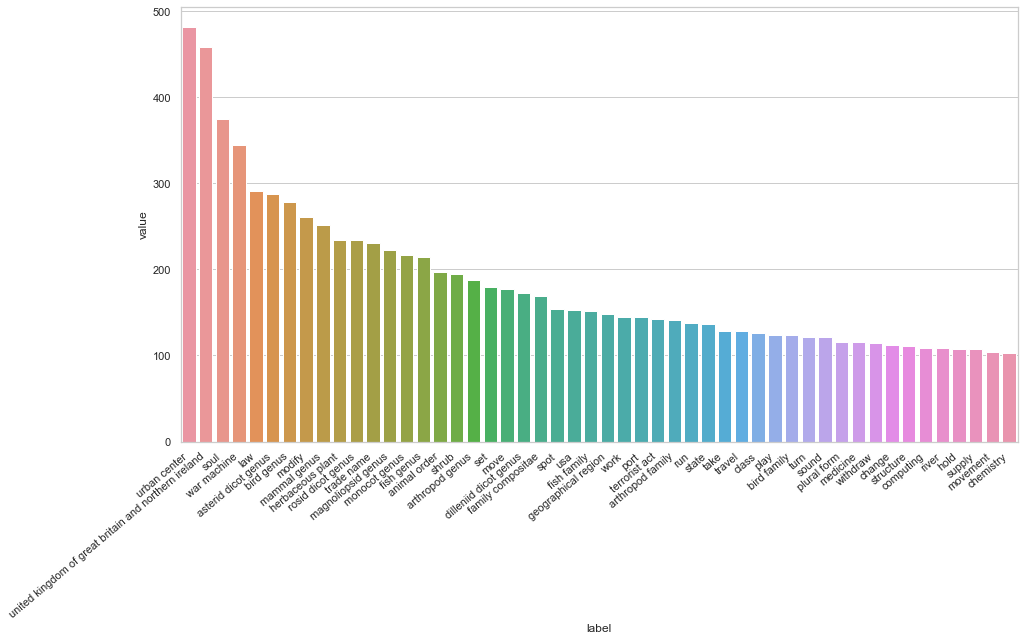

In [97]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=object_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [120]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
urban center,480
united kingdom of great britain and northern ireland,466
soul,393
war machine,345
asterid dicot genus,292


In [121]:
subject_counts.index

Index(['urban center', 'united kingdom of great britain and northern ireland',
       'soul', 'war machine', 'asterid dicot genus', 'law', 'bird genus',
       'modify', 'mammal genus', 'rosid dicot genus',
       ...
       'snake feeder', 'chelicera', 'mannerism', 'sprain', 'multiple', 'chock',
       'yap', 'western sand cherry', 'maquisard', 'glebe house'],
      dtype='object', length=32186)

In [122]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,urban center,480
1,united kingdom of great britain and northern i...,466
2,soul,393
3,war machine,345
4,asterid dicot genus,292


In [123]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,urban center,480
1,united kingdom of great britain and northern i...,466
2,soul,393
3,war machine,345
4,asterid dicot genus,292


[Text(0, 0, 'urban center'),
 Text(0, 0, 'united kingdom of great britain and northern ireland'),
 Text(0, 0, 'soul'),
 Text(0, 0, 'war machine'),
 Text(0, 0, 'asterid dicot genus'),
 Text(0, 0, 'law'),
 Text(0, 0, 'bird genus'),
 Text(0, 0, 'modify'),
 Text(0, 0, 'mammal genus'),
 Text(0, 0, 'rosid dicot genus'),
 Text(0, 0, 'herbaceous plant'),
 Text(0, 0, 'trade name'),
 Text(0, 0, 'magnoliopsid genus'),
 Text(0, 0, 'monocot genus'),
 Text(0, 0, 'fish genus'),
 Text(0, 0, 'animal order'),
 Text(0, 0, 'set'),
 Text(0, 0, 'shrub'),
 Text(0, 0, 'arthropod genus'),
 Text(0, 0, 'move'),
 Text(0, 0, 'dilleniid dicot genus'),
 Text(0, 0, 'family compositae'),
 Text(0, 0, 'usa'),
 Text(0, 0, 'fish family'),
 Text(0, 0, 'spot'),
 Text(0, 0, 'work'),
 Text(0, 0, 'terrorist act'),
 Text(0, 0, 'geographical region'),
 Text(0, 0, 'port'),
 Text(0, 0, 'run'),
 Text(0, 0, 'arthropod family'),
 Text(0, 0, 'take'),
 Text(0, 0, 'travel'),
 Text(0, 0, 'state'),
 Text(0, 0, 'class'),
 Text(0, 0, 'play'

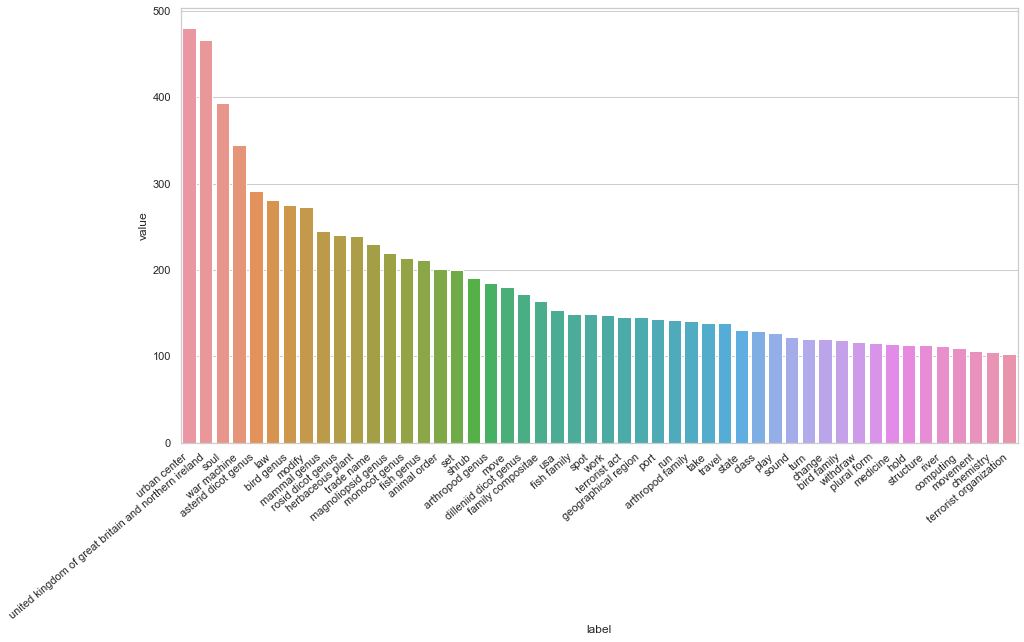

In [124]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=subject_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")